# Avaliação de modelos de classificação

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
* Holdout

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
dados = pd.DataFrame( np.c_[ iris["data"], iris["target"] ], columns=iris["feature_names"] + ["target"] )

print(dados)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                  5.1               3.5  ...               0.2     0.0
1                  4.9               3.0  ...               0.2     0.0
2                  4.7               3.2  ...               0.2     0.0
3                  4.6               3.1  ...               0.2     0.0
4                  5.0               3.6  ...               0.2     0.0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[150 rows x 5 columns]


In [3]:
from sklearn.model_selection import train_test_split

xTreino, xTeste, yTreino, yTeste = train_test_split( dados.iloc[:, :4], dados.iloc[:, 4:], test_size=0.3, random_state=13 )


In [4]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(xTreino, yTreino)

yPredito = modelo.predict(xTeste)

acuracia = modelo.score(xTeste, yTeste)
print("Acurácia: %f"%acuracia)

Acurácia: 0.977778


In [11]:
import sklearn.metrics as mt

acuracia = mt.accuracy_score(yTeste, yPredito)
print("Acurácia: %f"%acuracia)

precisao = mt.precision_score(yTeste, yPredito, average=None)
print("Precisões")
print(precisao)
print("Precisão média: %f"%np.mean(precisao))
print("Precisão média: %f"%mt.precision_score(yTeste, yPredito, average="macro"))

revocacao = mt.recall_score(yTeste, yPredito, average=None)
print("Revocações")
print(revocacao)

Acurácia: 0.977778
Precisões
[1.         0.92307692 1.        ]
Precisão média: 0.974359
Precisão média: 0.974359
Revocações
[1.         1.         0.94736842]


# Matriz de Confusão

In [12]:
matriz = mt.confusion_matrix(yTeste, yPredito)
print(matriz)

[[14  0  0]
 [ 0 12  0]
 [ 0  1 18]]


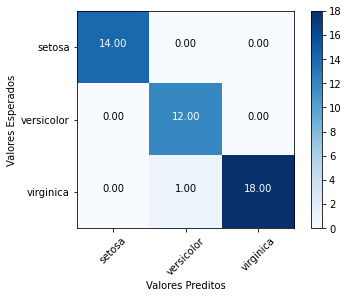

In [18]:
import matplotlib.pyplot as plt
import itertools as its

cmap = plt.cm.Blues
plt.imshow(matriz, interpolation='nearest', cmap=cmap)
plt.colorbar()
iclasses = np.arange(len(iris.target_names))
plt.xticks(iclasses, iris.target_names, rotation=45)
plt.yticks(iclasses, iris.target_names)
limiarCor = matriz.max() / 2.0
for i, j in its.product( range(matriz.shape[0]), range(matriz.shape[1]) ):
  plt.text(j, i, format(matriz[i, j], ".2f"), horizontalalignment="center", color="white" if matriz[i, j] > limiarCor else "black")

plt.ylabel("Valores Esperados")
plt.xlabel("Valores Preditos")
plt.show()

# Análise estatística

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

dados = datasets.load_breast_cancer()

print(dados.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [24]:
nTestes = 30

modeloNB = GaussianNB()
modeloLR = LogisticRegression()

acuraciasNB = []
acuraciasLR = []

for i in range(nTestes):
  xTreino, xTeste, yTreino, yTeste = train_test_split( dados.data, dados.target, test_size=0.3, random_state=i )
  scaler = preprocessing.StandardScaler()
  xTreino = scaler.fit_transform( xTreino )
  xTeste = scaler.transform( xTeste )
  # treinar modelo NB
  modeloNB.fit(xTreino, yTreino)
  yPredito = modeloNB.predict( xTeste )
  acuracia = mt.accuracy_score(yTeste, yPredito)
  acuraciasNB.append(acuracia)
  # treinar modelo LR
  modeloLR.fit(xTreino, yTreino)
  yPredito = modeloLR.predict( xTeste )
  acuracia = mt.accuracy_score(yTeste, yPredito)
  acuraciasLR.append(acuracia)

print("Média das acurácias do NB: %f"%np.mean(acuraciasNB))
print("Desvio padrão das acurácias do NB: %f"%np.std(acuraciasNB))

print("Média das acurácias do LR: %f"%np.mean(acuraciasLR))
print("Desvio padrão das acurácias do LR: %f"%np.std(acuraciasLR))

Média das acurácias do NB: 0.932554
Desvio padrão das acurácias do NB: 0.014619
Média das acurácias do LR: 0.974854
Desvio padrão das acurácias do LR: 0.010368


In [33]:
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
from scipy.stats import shapiro

alpha = 0.05

stat, pNB = shapiro(acuraciasNB)
stat, pLR = shapiro(acuraciasLR)

print(pNB)
print(pLR)

if pNB > alpha and pLR > alpha:
  print("Teste-T")
  teste = ttest_rel( acuraciasNB, acuraciasLR )
  print("p-valor: %e"%teste.pvalue)
else:
  print("Wilcoxon")
  teste = wilcoxon( acuraciasNB, acuraciasLR )
  print("p-valor: %e"%teste.pvalue)


0.10197848826646805
0.3272453248500824
Teste-T
p-valor: 3.023866e-12


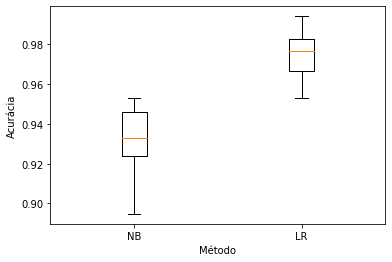

In [35]:
acuracias = [ acuraciasNB, acuraciasLR ]
fig, ax = plt.subplots()
ax.boxplot(acuracias, labels=["NB", "LR"])
plt.xlabel("Método")
plt.ylabel("Acurácia")
plt.show()

# Validação Cruzada

In [37]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

yTeste = []
yPreditoNB = []
yPreditoLR = []

for iTreino, iTeste in skf.split( dados.data, dados.target ):
  scaler = preprocessing.StandardScaler()
  xTreino = scaler.fit_transform( dados.data[ iTreino ] )
  xTeste = scaler.transform( dados.data[ iTeste ] )
  yTeste = [ *yTeste, *dados.target[ iTeste ] ]
  # NB
  modeloNB.fit(xTreino, dados.target[ iTreino ])
  predito = modeloNB.predict(xTeste)
  yPreditoNB = [ *yPreditoNB, *predito ]
  # LR
  modeloLR.fit(xTreino, dados.target[ iTreino ])
  predito = modeloLR.predict(xTeste)
  yPreditoLR = [ *yPreditoLR, *predito ]

print(len(dados.data))
print(len(yTeste))
print(len(yPreditoNB))

acuracia = mt.accuracy_score(yTeste, yPreditoNB)
print("Acurácia NB: %f"%acuracia)

acuracia = mt.accuracy_score(yTeste, yPreditoLR)
print("Acurácia LR: %f"%acuracia)

569
569
569
Acurácia NB: 0.931459
Acurácia LR: 0.977153


# Curva ROC

In [38]:
print(yPreditoNB)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 

In [39]:
yTeste = []
pNB = []
pLR = []

for iTreino, iTeste in skf.split( dados.data, dados.target ):
  scaler = preprocessing.StandardScaler()
  xTreino = scaler.fit_transform( dados.data[ iTreino ] )
  xTeste = scaler.transform( dados.data[ iTeste ] )
  yTeste = [ *yTeste, *dados.target[ iTeste ] ]
  # NB
  modeloNB.fit(xTreino, dados.target[ iTreino ])
  p = modeloNB.predict_proba(xTeste)[:,1]
  pNB = [ *pNB, *p ]
  # LR
  modeloLR.fit(xTreino, dados.target[ iTreino ])
  p = modeloLR.decision_function(xTeste)
  pLR = [ *pLR, *p ]

print(pNB)

[1.60596547568133e-156, 0.09174317896634933, 1.3751846331989929e-101, 6.879292205701025e-79, 1.0, 2.466915071640743e-55, 0.9999999999999929, 1.0, 0.9731149825486477, 1.0, 1.0, 1.4374672093871431e-288, 1.7213423031335296e-14, 0.9999999999999964, 0.9999999866726698, 1.0, 1.0, 2.003019772782757e-10, 9.274595103274224e-82, 1.0, 3.335090526390887e-15, 3.8450436924218386e-58, 3.7822168675910225e-238, 0.9999999999952074, 0.9999999999997442, 7.608316999533549e-26, 4.432684663986502e-57, 8.787121576248568e-259, 0.999999999999936, 0.9999999999999929, 6.693772384298098e-145, 0.9999999999999964, 8.402674862792915e-27, 1.0, 1.0, 0.9935945043541573, 0.9999999999993072, 0.9999999999992752, 1.0, 0.007965865971494054, 1.0, 3.9203424867964687e-31, 0.7174727190359322, 1.0, 3.8306193658223523e-07, 1.0, 1.3659950778777127e-08, 1.6223022833665214e-09, 0.9999999999999964, 0.9999999999946922, 0.999999999999666, 0.9999997015471839, 0.999999999996021, 1.0, 1.0, 1.0, 0.9999999999998259, 3.403644343116509e-10, 4.

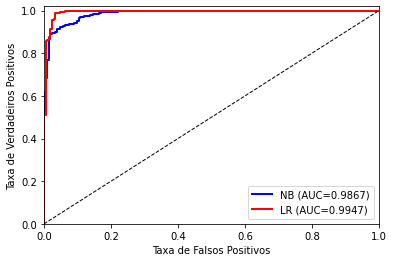

In [44]:
fprNB, tprNB, _ = mt.roc_curve(yTeste, pNB)
fprLR, tprLR, _ = mt.roc_curve(yTeste, pLR)

aucNB = mt.roc_auc_score( yTeste, pNB )
aucLR = mt.roc_auc_score( yTeste, pLR )

plt.plot(fprNB, tprNB, color="blue", lw=2, label="NB (AUC=%0.4f)"%aucNB)
plt.plot(fprLR, tprLR, color="red", lw=2, label="LR (AUC=%0.4f)"%aucLR)

plt.plot([0,1], [0, 1], color="black", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend(loc="lower right")
plt.show()

# Balanceamento

In [46]:
classes, contagens = np.unique( dados.target, return_counts=True )
print(dict(zip(classes, contagens)))

{0: 212, 1: 357}


In [47]:
# Para os dados de treinamento!

import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample( dados.data, dados.target )

classes, contagens = np.unique( y, return_counts=True )
print(dict(zip(classes, contagens)))

{0: 357, 1: 357}


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
